<a href="https://colab.research.google.com/github/somayehpakdel/retinopathy_classification/blob/main/aptos_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Retinopathy Grade Classification using Fastai Library

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook timm
import fastbook
fastbook.setup_book()
from fastbook import *
import pathlib
import copy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.4 MB/s eta 0:00:00
Mounted at /content/gdrive


##Preprocessing and Prepairing Data

### splitting data to train/valid/test


As we know, the balance of the training data has a significant impact on the interpretation of the results of the evaluation criteria of the model.

Therefore, we observe the ratio of classes in dividing the data into test/train/valid. Actually, in these divisions, we consider the distribution of the classes to be the same.

In [ ]:
#for generating train/valid/test sets
path=pathlib.Path('/content/gdrive/MyDrive/fastai_projects/aptos')

df_aptos=pd.read_csv(path/'trainnew.csv') 

#df_aptos['id_code']=df_aptos['id_code']+'.png' # for add '.png' in filenames column(i.e. 'id_code')
classes=len(df_aptos['diagnosis'].unique())
aptos_test=pd.DataFrame(columns=df_aptos.columns)
aptos_train=pd.DataFrame(columns=df_aptos.columns)
aptos_valid=pd.DataFrame(columns=df_aptos.columns)
aptos_train_valid=pd.DataFrame(columns=['id_code', 'diagnosis','is_valid'])

for i in range(classes):
  classi=df_aptos.loc[df_aptos['diagnosis']==i]
  classi_tst=classi.sample(frac=0.1)
  aptos_test=aptos_test.append(classi_tst)
  classi_res=classi.loc[~classi.index.isin(classi_tst.index)]
  classi_valid=classi_res.sample(frac=2/9)
  aptos_valid=aptos_valid.append(classi_valid)
  classi_train_valid=copy.deepcopy(classi_res)
  classi_train_valid.loc[classi_res.index.isin(classi_valid.index),'is_valid']=True
  classi_train_valid.loc[~classi_res.index.isin(classi_valid.index),'is_valid']=False
  aptos_train_valid=aptos_train_valid.append(classi_train_valid)
  classi_train=classi_res.loc[~classi_res.index.isin(classi_valid.index)]
  aptos_train=aptos_train.append(classi_train)
  print(f'class{i}:','data>',len(classi),'train>',len(classi_train),'valid>',len(classi_valid),'test>',len(classi_tst),'sum>',len(classi_train)+len(classi_valid)+len(classi_tst))

print('df_aptos>',len(df_aptos),'aptos_train>',len(aptos_train),'aptos_valid>',len(aptos_valid),'aptos_test>',len(aptos_test),'sum>',len(aptos_train)+len(aptos_valid)+len(aptos_test))
aptos_train_valid.to_csv('/...path.../aptos_train_valid.csv',index=False)
aptos_test.to_csv('/...path.../aptos_test.csv',index=False)


class0: data> 1805 train> 1264 valid> 361 test> 180 sum> 1805
class1: data> 370 train> 259 valid> 74 test> 37 sum> 370
class2: data> 999 train> 699 valid> 200 test> 100 sum> 999
class3: data> 193 train> 135 valid> 39 test> 19 sum> 193
class4: data> 295 train> 206 valid> 59 test> 30 sum> 295
df_aptos> 3662 aptos_train> 2563 aptos_valid> 733 aptos_test> 366 sum> 3662


### Creating Dataloaders

In [ ]:
path=pathlib.Path('/content/gdrive/MyDrive/fastai_projects/aptos')
df_aptos_train=pd.read_csv(path/'aptos_train_valid.csv')  #for training
print(df_aptos_train.shape)
print(df_aptos_train.head())

(3296, 3)
            id_code  diagnosis  is_valid
0  002c21358ce6.png          0     False
1  005b95c28852.png          0     False
2  0097f532ac9f.png          0      True
3  00cc2b75cddd.png          0     False
4  00f6c1be5a33.png          0     False


In [ ]:
#%cd path to utils_aptos_classification.py 
%cd /content/gdrive/MyDrive/fastai_projects/aptos

/content/gdrive/MyDrive/fastai_projects/aptos


For system deployment purposes (saving and loading and using the model) we need to put the side codes in another file (please see ‍‍‍`utils_aptos_classification.py`) and import it:

In [ ]:
from utils_aptos_classification import *
aptos_dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                      get_x=get_x_aptos,
                      get_y=get_y_aptos,
                      batch_tfms=Normalize(),
                      splitter=ColSplitter())
dls_aptos=aptos_dblock.dataloaders(df_aptos_train)
#dls_aptos.show_batch(max_n=6)

####creating DataLoaders using **ImageDataLoaders.from_df**

We can also create DataLoders using `ImageDataLoaders.from_df`command:

In [ ]:
path=pathlib.Path('/content/gdrive/MyDrive/fastai_projects/aptos')
df_aptos=pd.read_csv(path/'trainnew.csv')
print(df_aptos.shape)
#df_aptos['id_code']=df_aptos['id_code']+'.png'
print(df_aptos.head())
#df_aptos.to_csv(path/'trainnew.csv',index=False)

(3662, 2)
            id_code  diagnosis
0  000c1434d8d7.png          2
1  001639a390f0.png          4
2  0024cdab0c1e.png          1
3  002c21358ce6.png          0
4  005b95c28852.png          0


In [ ]:
dls=ImageDataLoaders.from_df(df_aptos,path,folder='preprocessed',label_col=1,batch_tfms=Normalize(),bs=64)

In [ ]:
#dls.train_ds,dls.valid_ds
#dls.train.show_batch()
dls.valid.show_batch()

In [ ]:
df_tst=df_aptos.iloc[:10]
#print(df_tst)
#print(df_aptos)
#a=dls.test_dl(df_tst,with_labels=True)
a = test_set(dls.valid_ds, df_tst,with_labels=True)
a

(#10) [(PILImage mode=RGB size=256x256, TensorCategory(2)),(PILImage mode=RGB size=256x256, TensorCategory(4)),(PILImage mode=RGB size=256x256, TensorCategory(1)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(4)),(PILImage mode=RGB size=256x256, TensorCategory(0)),(PILImage mode=RGB size=256x256, TensorCategory(2)),(PILImage mode=RGB size=256x256, TensorCategory(2)),(PILImage mode=RGB size=256x256, TensorCategory(1))]

In [ ]:
fnames=get_image_files(path)
fns_small = fnames[:10]; fns_small[0]


Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b89938407ee6.png')

In [ ]:
a=dls.test_dl(fns_small,with_labels=True),a

AssertionError: ignored

In [ ]:
a = test_set(dls.valid_ds, fns_small); a

(#10) [(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,),(PILImage mode=RGB size=256x256,)]

In [ ]:
b = test_set(dls.valid_ds, fns_small, with_labels=True); b


AssertionError: ignored

## Model And Training: Resnet50



In [ ]:
from timm import create_model
from utils_aptos_classification import *

net=create_model('resnet50',pretrained=True)
body = create_body(net, pretrained=True, cut=-1)  
head=model_head(2048,5)
model = nn.Sequential(body,head)
apply_init(model[1], nn.init.kaiming_normal_)

In [ ]:
learn = Learner(dls_aptos, model, loss_func=LabelSmoothingCrossEntropy(),
                                 splitter=default_split,metrics=F1Score(average='micro'))
#                 splitter=default_split,metrics=[accuracy,Precision(average=None),
 #                Recall(average=None),F1Score(average=None),RocAuc(average='macro')])
callbacks=[SaveModelCallback(monitor='f1_score',fname='E1_resnet50_1'),
           EarlyStoppingCallback(monitor='f1_score',patience=10,min_delta=0.1)]
learn.freeze()
#learn.summary()

In [ ]:
lr_min,lr_steep=learn.lr_find(suggest_funcs=(minimum,steep))
print(f'minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

In [ ]:
learn.fit_one_cycle(50,3e-3,cbs=callbacks)

epoch,train_loss,valid_loss,f1_score,time
0,1.158314,1.179705,0.784447,00:32
1,1.149934,1.186366,0.773533,00:33
2,1.145129,1.182771,0.777626,00:34
3,1.140582,1.179108,0.780355,00:33
4,1.137836,1.180800,0.777626,00:32
5,1.134908,1.185415,0.772169,00:32
6,1.133876,1.175955,0.784447,00:32
7,1.135617,1.188631,0.770805,00:31
8,1.139969,1.186168,0.774898,00:31
9,1.147213,1.194122,0.763984,00:31


Better model found at epoch 0 with f1_score value: 0.7844474761255116.
No improvement since epoch 0: early stopping


In [ ]:
learn.validate()

minimum/10: 6.31e-08, steepest point: 1.32e-06


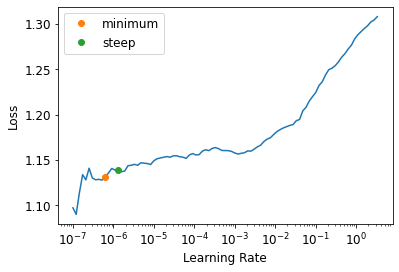

In [ ]:
learn.unfreeze()
lr_min,lr_steep=learn.lr_find(suggest_funcs=(minimum,steep))
print(f'minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

In [ ]:
learn.fit_one_cycle(30,lr_max=slice(1e-6,1e-4))

In [ ]:
learn.export('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resnet_aptos_80_with_utils.pkl')

In [ ]:
learn.save('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resnet_aptos_80')

Path('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resnet_aptos_80.pth')

In [ ]:
save_pickle('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resnet_aptos_80_with_utils.pkl',learn)

In [ ]:
learn = Learner(dls_aptos, model, loss_func=LabelSmoothingCrossEntropy(),
                                 splitter=default_split,metrics=F1Score(average='micro'))

In [ ]:
learn_inference=learn.load('/content/gdrive/MyDrive/fastai_projects/aptos/models/E1_resnet50')

/usr/local/lib/python3.8/dist-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


## test_set

In [ ]:
df_aptos_test=pd.read_csv(path/'aptos_test.csv')
print(df_aptos_test.head())
#test_dl = test_set(dls_aptos.valid_ds, df_aptos_test, with_labels=True) #OR
#test_dl=dls_aptos.test_dl(df_aptos_test, with_labels=True)
test_dl=learn_inference.dls.test_dl(df_aptos_test,with_labels=True)
#test_dl[0][0].show()
#test_dl.show_batch()
#test_dl.vocab

            id_code  diagnosis
0  949710bead24.png          0
1  a73c3d516c59.png          0
2  384db24ebbd7.png          0
3  5293576816aa.png          0
4  6f0e5848d9ce.png          0


In [ ]:
print(learn_inference.validate())
learn_inference.validate(dl=test_dl)

[1.181611180305481, 0.7803547066848567]


(#2) [1.172781229019165,0.7896174863387978]

In [ ]:
preds=learn_inference.get_preds(dl=test_dl)

In [ ]:
accuracy(preds[0],preds[1])

TensorBase(0.7896)

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score
print('f1_score',f1_score(preds[1].numpy(),preds[0].argmax(dim=1).numpy(),average=None))
print('precision_score',precision_score(preds[1].numpy(),preds[0].argmax(dim=1).numpy(),average=None))
print('recall_score',recall_score(preds[1].numpy(),preds[0].argmax(dim=1).numpy(),average=None))
#print('roc_auc_score',roc_auc_score(preds[1].numpy(),preds[0].argmax(dim=1).numpy(),average='micro',multi_class='ovr'))

f1_score [0.9673913  0.57142857 0.72803347 0.         0.22222222]
precision_score [0.94680851 0.60606061 0.62589928 0.         0.66666667]
recall_score [0.98888889 0.54054054 0.87       0.         0.13333333]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####roc

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(np.array([0,1,2,3,4]))
print(label_binarizer)
y_onehot_test = label_binarizer.transform(preds[1])
y_onehot_test.shape 
print(y_onehot_test)
print(label_binarizer.transform([4]))

LabelBinarizer()
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
[[0 0 0 0 1]]


In [ ]:
class_of_interest = 4
label_binarizer.classes_ == class_of_interest

array([False, False, False, False,  True])

In [ ]:
class_of_interest = 4
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id


((), 4)

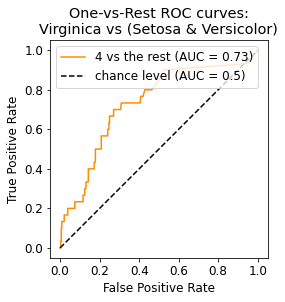

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
y_score=preds[0]
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

##load and predict

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/gdrive/MyDrive/fastai_projects/aptos

/content/gdrive/MyDrive/fastai_projects/aptos


In [ ]:
from utils_aptos_classification import *
mylearn=load_learner('/content/gdrive/MyDrive/fastai_projects/aptos/models/E1_resnet50_1.pth')
#test_dl=model.dls.test_dl(get_image_files(path)[:100])
#preds=model.get_preds(dl=test_dl)


AttributeError: ignored

In [ ]:
mylearn.dls.train_ds
mylearn.validate(dl=test_dl)

(#2) [0.9848332405090332,1.0]

In [ ]:
len(preds),preds[0].shape,preds[1],test_dl

(2, torch.Size([100, 5]), None, <fastai.data.core.TfmdDL at 0x7f5886847940>)

# Model And Training: EfficientNet

In [ ]:
import pathlib
from fastbook import *
path=pathlib.Path('/content/gdrive/MyDrive/fastai_projects/aptos')
df_aptos=pd.read_csv(path/'train.csv')
print(df_aptos.shape)
print(df_aptos.head())
get_image_files(path)

(3662, 2)
        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


(#3662) [Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b89938407ee6.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8ac328009e0.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8dab47a260e.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8e20c076b03.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8e9a8f4617d.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8ebedd382de.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8f1b30877db.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b8fb9f55cd6d.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b90bc89ce8d8.png'),Path('/content/gdrive/MyDrive/fastai_projects/aptos/preprocessed/b9127e38d9b9.png')...]

In [ ]:
df_test=df_aptos.sample(n=730)
index=~df_aptos.index.isin(df_test.index)
df_aptos_train=df_aptos.loc[~df_aptos.index.isin(df_test.index)]
df_aptos_train.shape

(2932, 2)

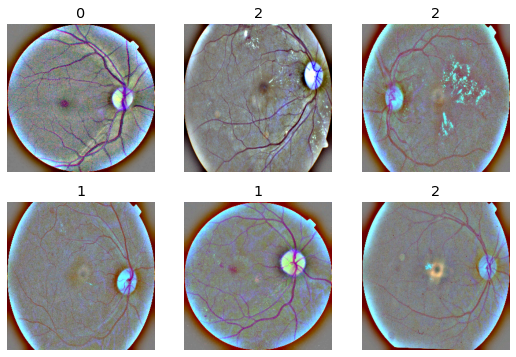

In [ ]:
def get_x_aptos(r):
  name=r['id_code']
  return path/'preprocessed'/f'{name}.png'
def get_y_aptos(r):return r['diagnosis']

aptos_dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                      get_x=get_x_aptos,get_y=get_y_aptos,
                      batch_tfms=Normalize(),
                      splitter=RandomSplitter(seed=42,valid_pct=0.2))
dls_aptos=aptos_dblock.dataloaders(df_aptos_train,bs=32)
dls_aptos.show_batch(max_n=6)

In [ ]:
cd /content/gdrive/MyDrive/aptos256_preprocessed/codes

/content/gdrive/.shortcut-targets-by-id/1t4-9XFmREiRQDxfXB1zD1RcR43y59uvx/aptos256_preprocessed/codes


In [ ]:
from utils_aptos_classification import *
model=load_learner('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resner_aptos_80.pkl')
test_dl=model.dls.test_dl(get_image_files(path))
preds=model.get_preds(dl=test_dl)

RuntimeError: ignored

In [ ]:
#x,y=dls_aptos.one_batch()
#x.shape,y.shape,y[0]
print(len(dls_aptos.valid),len(dls_aptos.train),len(dls_aptos[0]),dls_aptos.train[0])
dls_aptos.test_dl

TypeError: ignored

In [ ]:
! pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 40.6 MB/s eta 0:00:00


In [ ]:
import timm
all_models = timm.list_models('*efficient*')
all_models

In [ ]:
from timm import create_model
net=create_model('efficientnet_b3a',pretrained=True)
body = create_body(net, pretrained=True, cut=-1)
class model_head(nn.Module):
  def __init__(self,nf,n_classes):
    super(model_head,self).__init__()
   # self.pooling=nn.AdaptiveAvgPool2d(1)
    self.bn1=nn.BatchNorm1d(nf)
    self.do1=nn.Dropout(p=0.4)
    self.linear1=nn.Linear(nf,2048)
    self.bn2=nn.BatchNorm1d(2048)
    self.do2=nn.Dropout(p=0.4)
    self.linear2=nn.Linear(2048,1024)
    self.bn3=nn.BatchNorm1d(1024)
    self.do3=nn.Dropout(p=0.3)
    self.linear3=nn.Linear(1024,512)
    self.bn4=nn.BatchNorm1d(512)
    self.do4=nn.Dropout(p=0.3)
    self.linear4=nn.Linear(512,n_classes)
  def forward(self,x):
  #  x=self.pooling(x)
    #print('pool')
    x=self.bn1(x)
    #print('bn1')
    x=self.do1(x)
    #x=self.linear1(x)
    x=F.elu(self.linear1(x))
    #print('elu1')
    x=self.bn2(x)
    x=self.do2(x)
    x=F.elu(self.linear2(x))
    #print('elu2')
    x=self.bn3(x)
    x=self.do3(x)
    x=F.elu(self.linear3(x))
    x=self.bn4(x)
    x=self.do4(x)
    x=self.linear4(x)
    #print(x.shape)
    x=F.softmax(x,dim=1)
    return x


nf = num_features_model(nn.Sequential(*body.children()))
head=model_head(nf=nf,n_classes=5)
model = nn.Sequential(body,head)
apply_init(model[1], nn.init.kaiming_normal_)

In [ ]:
print(nf)

1536


In [ ]:
learn = Learner(dls_aptos, model, loss_func=LabelSmoothingCrossEntropy(),
                 splitter=default_split,metrics=[accuracy,Precision(average='macro'),
               Recall(average='macro'),F1Score(average='macro'),RocAuc(average='macro')])
learn.freeze()
learn.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 40 x 128 x 128 
Conv2d                                    1080       False     
Identity                                                       
SiLU                                                           
Conv2d                                    360        False     
Identity                                                       
SiLU                                                           
____________________________________________________________________________
                     32 x 10 x 1 x 1     
Conv2d                                    410        False     
SiLU                                                           
____________________________________________________________________________
                     32 x 40 x 1 x 1     
Conv2d                                    440        False     
Sigmoid                            

minimum/10: 6.31e-02, steepest point: 1.00e-03


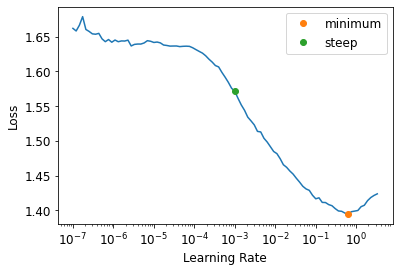

In [ ]:
lr_min,lr_steep=learn.lr_find(suggest_funcs=(minimum,steep))
print(f'minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

In [ ]:
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,1.275249,1.205091,0.754098,0.386774,0.414447,0.395223,0.619524,00:34
1,1.236520,1.178940,0.784153,0.429565,0.467542,0.446195,0.701881,00:32
2,1.224715,1.212395,0.744536,0.390439,0.469046,0.417242,0.754863,00:34
3,1.205474,1.166674,0.796448,0.436367,0.480876,0.455603,0.684104,00:35
4,1.190836,1.166152,0.797814,0.438330,0.476633,0.454252,0.704854,00:33


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

minimum/10: 1.58e-07, steepest point: 9.12e-07


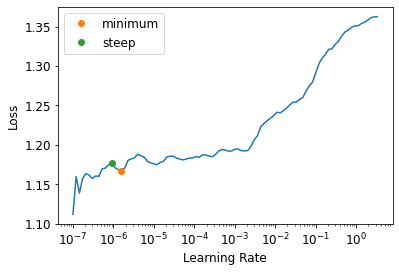

In [ ]:
learn.unfreeze()
lr_min,lr_steep=learn.lr_find(suggest_funcs=(minimum,steep))
print(f'minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

In [ ]:
learn.fit_one_cycle(30,lr_max=slice(1e-6,2e-6))

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,1.184447,1.166489,0.799180,0.441762,0.479937,0.457540,0.695744,00:44
1,1.174871,1.166274,0.797814,0.438402,0.479390,0.455745,0.702788,00:45
2,1.185629,1.166688,0.797814,0.442776,0.475689,0.454868,0.683223,00:45
3,1.192245,1.163168,0.801913,0.446148,0.480448,0.458831,0.670224,00:45
4,1.198589,1.167271,0.796448,0.436079,0.478118,0.454210,0.700124,00:45
5,1.189757,1.167604,0.795082,0.433843,0.481636,0.455178,0.695021,00:45


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

KeyboardInterrupt: ignored

In [ ]:
save_pickle('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resner_aptos_80.pkl',learn)

In [ ]:
learn.save('/content/gdrive/MyDrive/fastai_projects/aptos/results/Model And Training: Resnet50_80percent/resnet_aptos_80')